# REcap for Speech Recognition Implementation  
*   **Imports**
*   **Initialization**
*   **Run**
*   **Plots**

In [8]:
!pip install pydub
import os
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [9]:
audio_file_Female = "/content/female.m4a"
audio_file_Meso_anaLsa4ab = "/content/Meso_AnaLsaShab.m4a"
audio_file_RagolA5dr = "/content/ELragol_Ela5dar.m4a"

In [10]:
female_wav = 'female.wav'
Meso_anaLsa4ab_wav = 'Meso_anaLsa4ab.wav'
RagolA5dr_wav = 'RagolA5dr.wav'

def covert2wav(audiofile, wavoutfile, formatin='m4a', formatout='wav'):
  sound = AudioSegment.from_file(audiofile, formatin)
  file_handle = sound.export(wavoutfile, formatout)
  return

covert2wav(audio_file_Female, female_wav)
covert2wav(audio_file_Meso_anaLsa4ab, Meso_anaLsa4ab_wav)
covert2wav(audio_file_RagolA5dr, RagolA5dr_wav)

In [11]:
ipd.Audio(Meso_anaLsa4ab_wav)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
ipd.Audio(RagolA5dr_wav)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
ipd.Audio(female_wav)

In [46]:
meso_4ab, sr_4b = librosa.load(Meso_anaLsa4ab_wav)
meso_a5dr, sr_5dr = librosa.load(RagolA5dr_wav)
fem, sr_fem = librosa.load(female_wav)

In [15]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

In [20]:
S_meso_4ab= librosa.stft(meso_4ab, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
S_meso_a5dr= librosa.stft(meso_a5dr, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
S_fem= librosa.stft(fem, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)

In [23]:
print(S_meso_4ab.shape)
print(S_meso_a5dr.shape)
print(S_fem.shape)

(1025, 883)
(1025, 821)
(1025, 143)


In [24]:
Y_meso_4ab = librosa.power_to_db(np.abs(S_meso_4ab) ** 2)
Y_meso_a5dr = librosa.power_to_db(np.abs(S_meso_a5dr) ** 2)
Y_fem = librosa.power_to_db(np.abs(S_fem) ** 2)

In [30]:
def plot_spectogram(Y_data, sr, HOP_LENGTH, y_axis = "log"):
  plt.figure(figsize=(25,10))
  librosa.display.specshow(Y_data,
                           sr=sr,
                           hop_length = HOP_LENGTH,
                           x_axis="time",
                           y_axis= y_axis
                           )
  plt.colorbar(format='red')

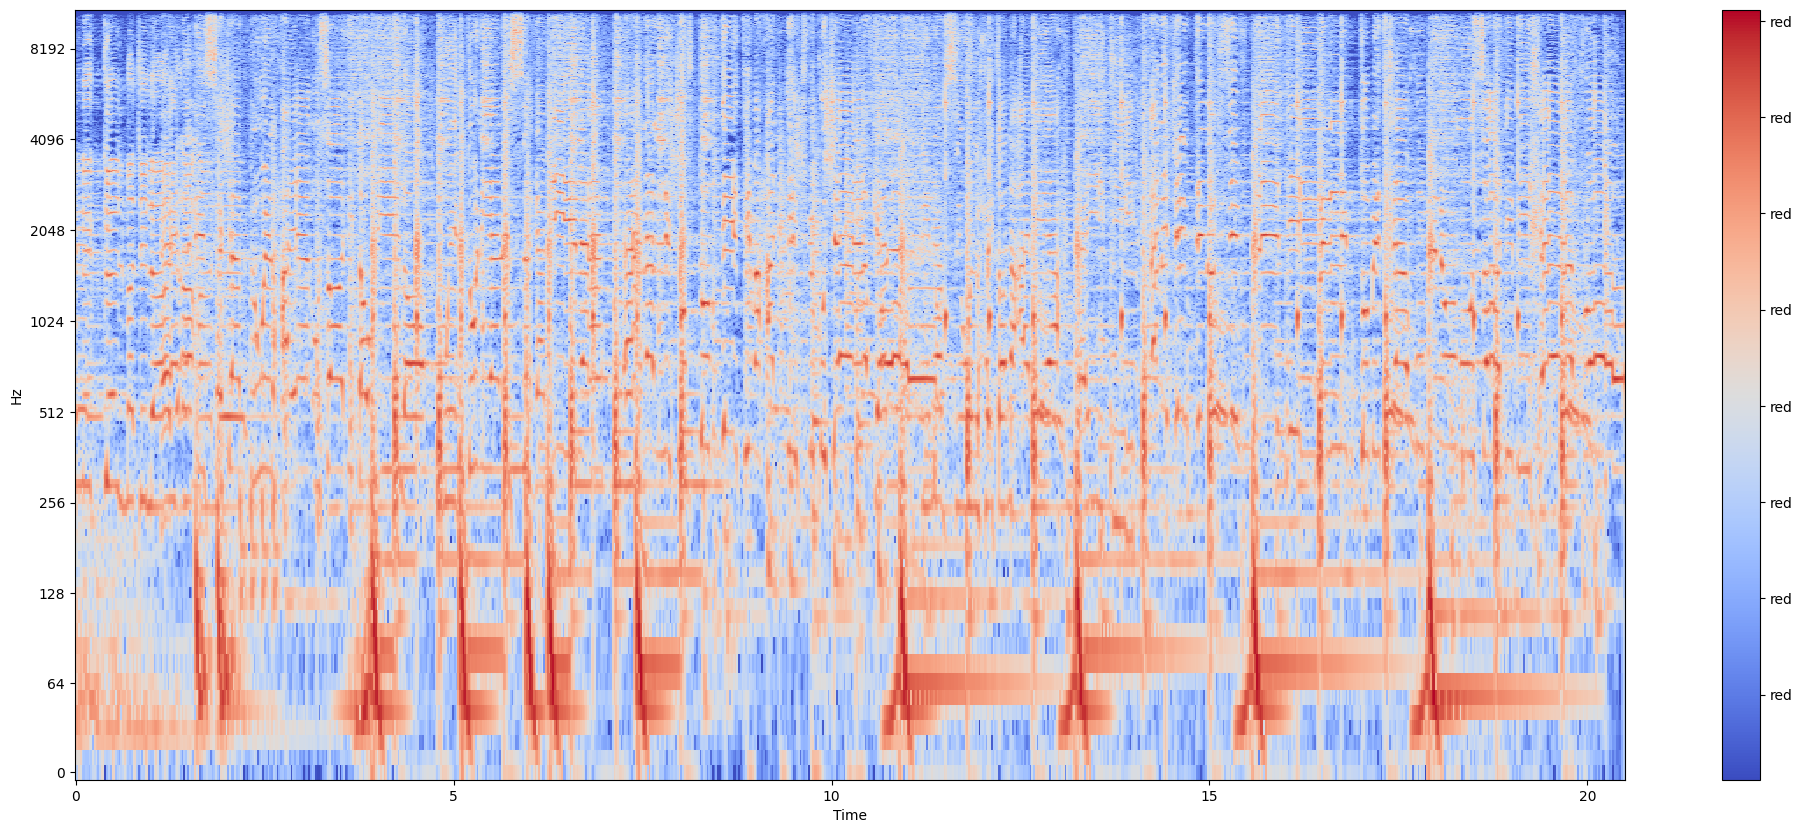

In [31]:
plot_spectogram(Y_meso_4ab, sr_4b, HOP_LENGTH)

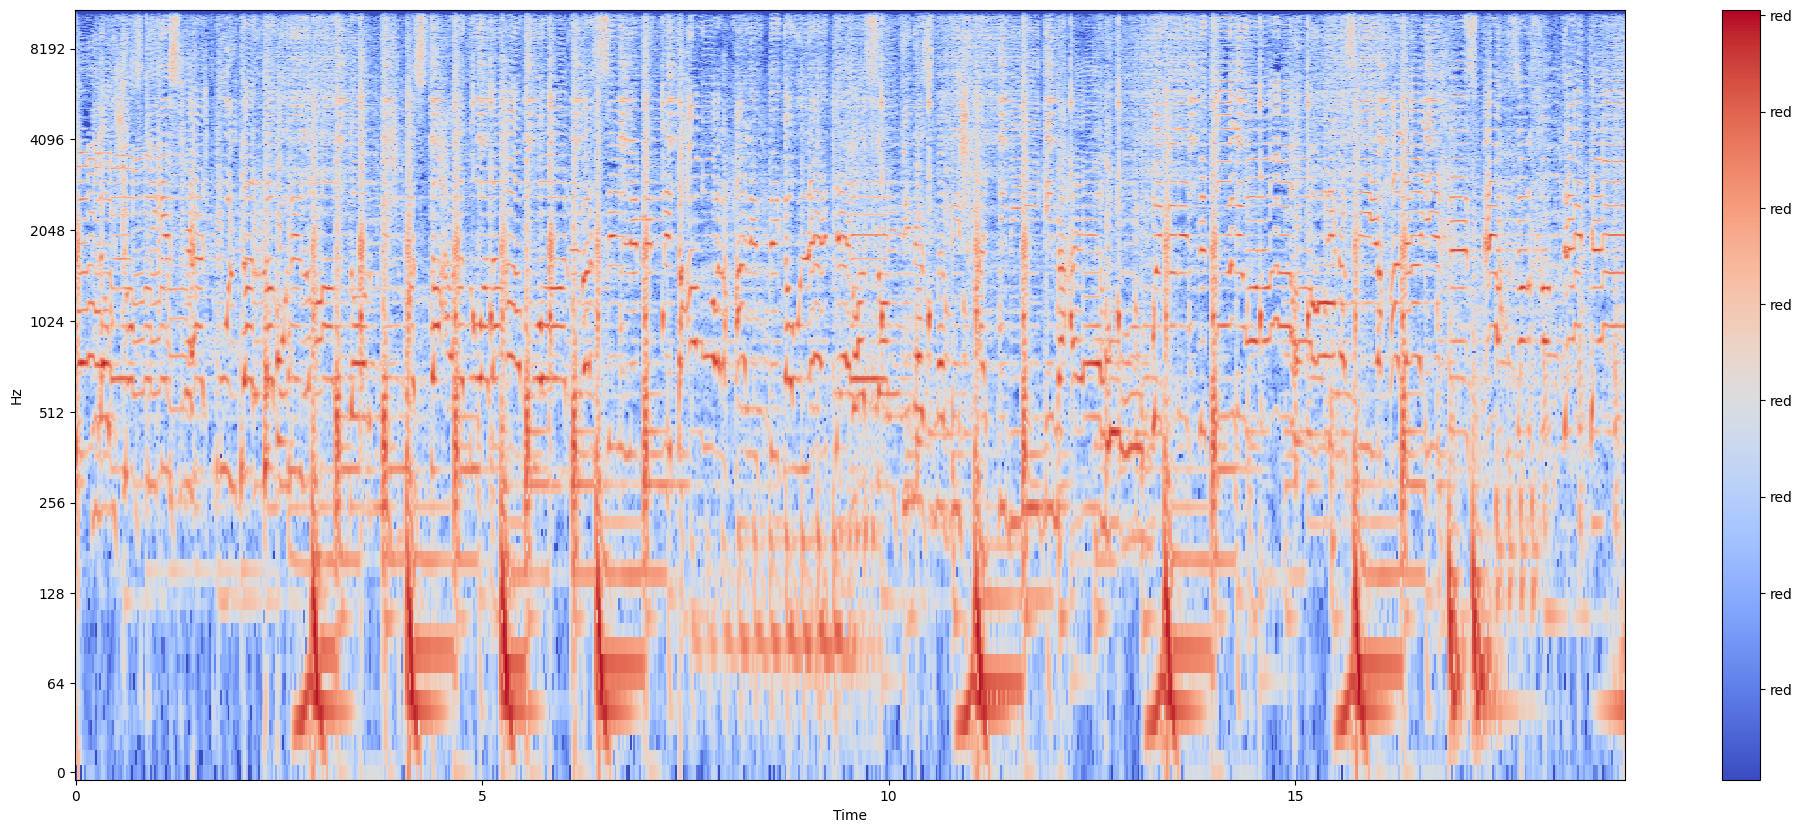

In [32]:
plot_spectogram(Y_meso_a5dr, sr_5dr, HOP_LENGTH)

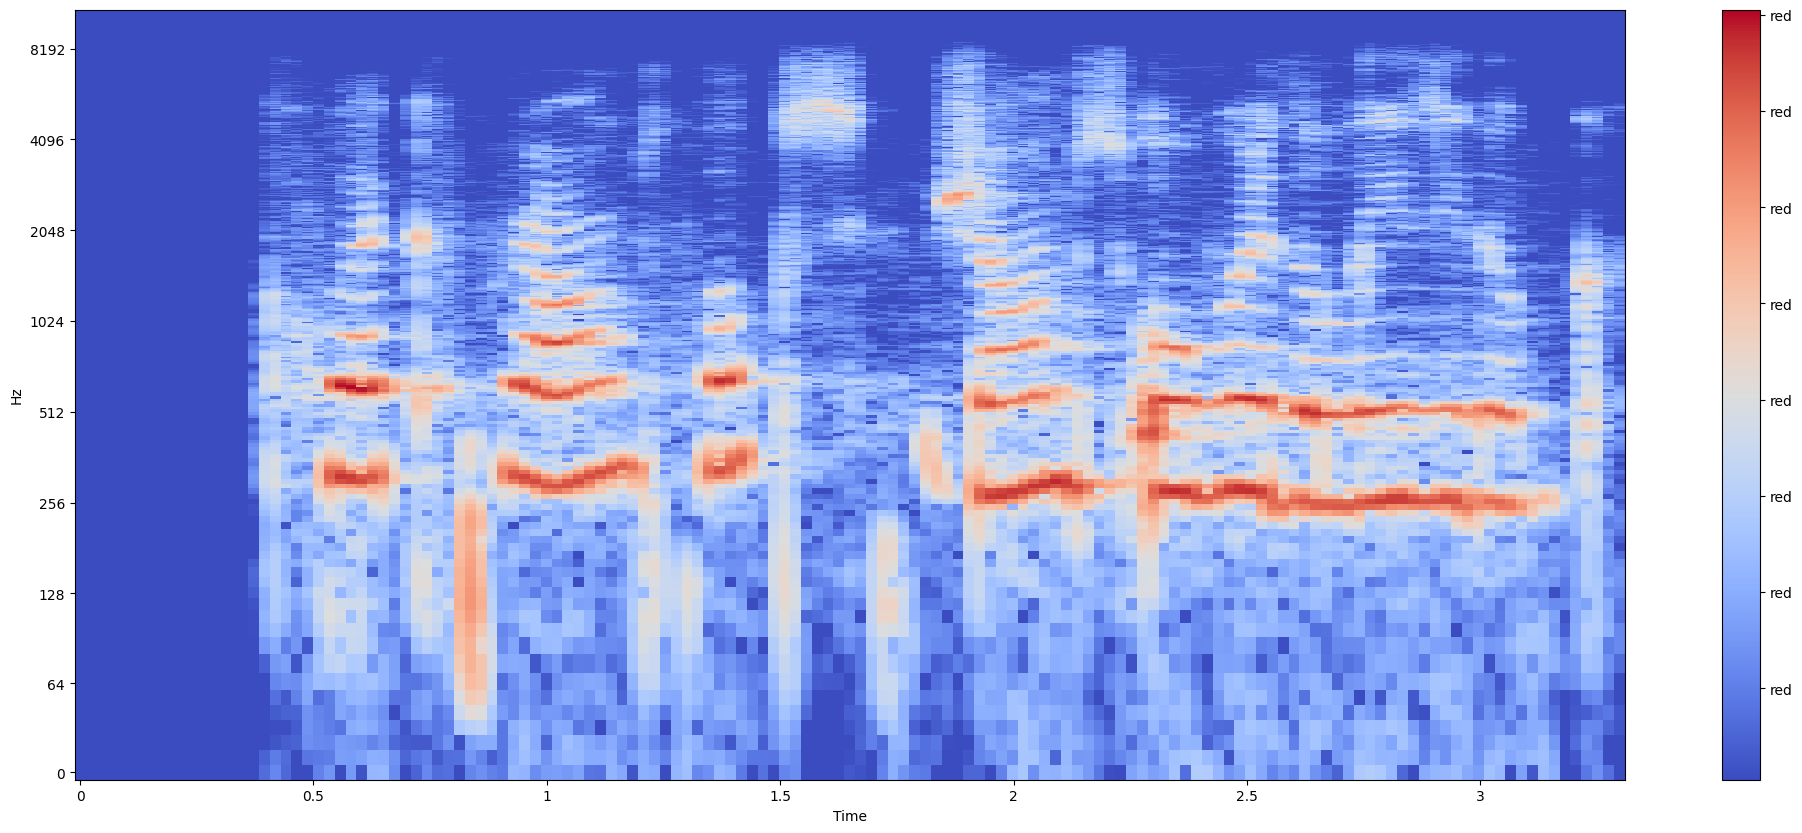

In [35]:
plot_spectogram(Y_fem, sr_fem, HOP_LENGTH, y_axis="log")

In [36]:
filter_banks= librosa.filters.mel(n_fft= 2048, sr=22050, n_mels=20)
filter_banks.shape

(20, 1025)

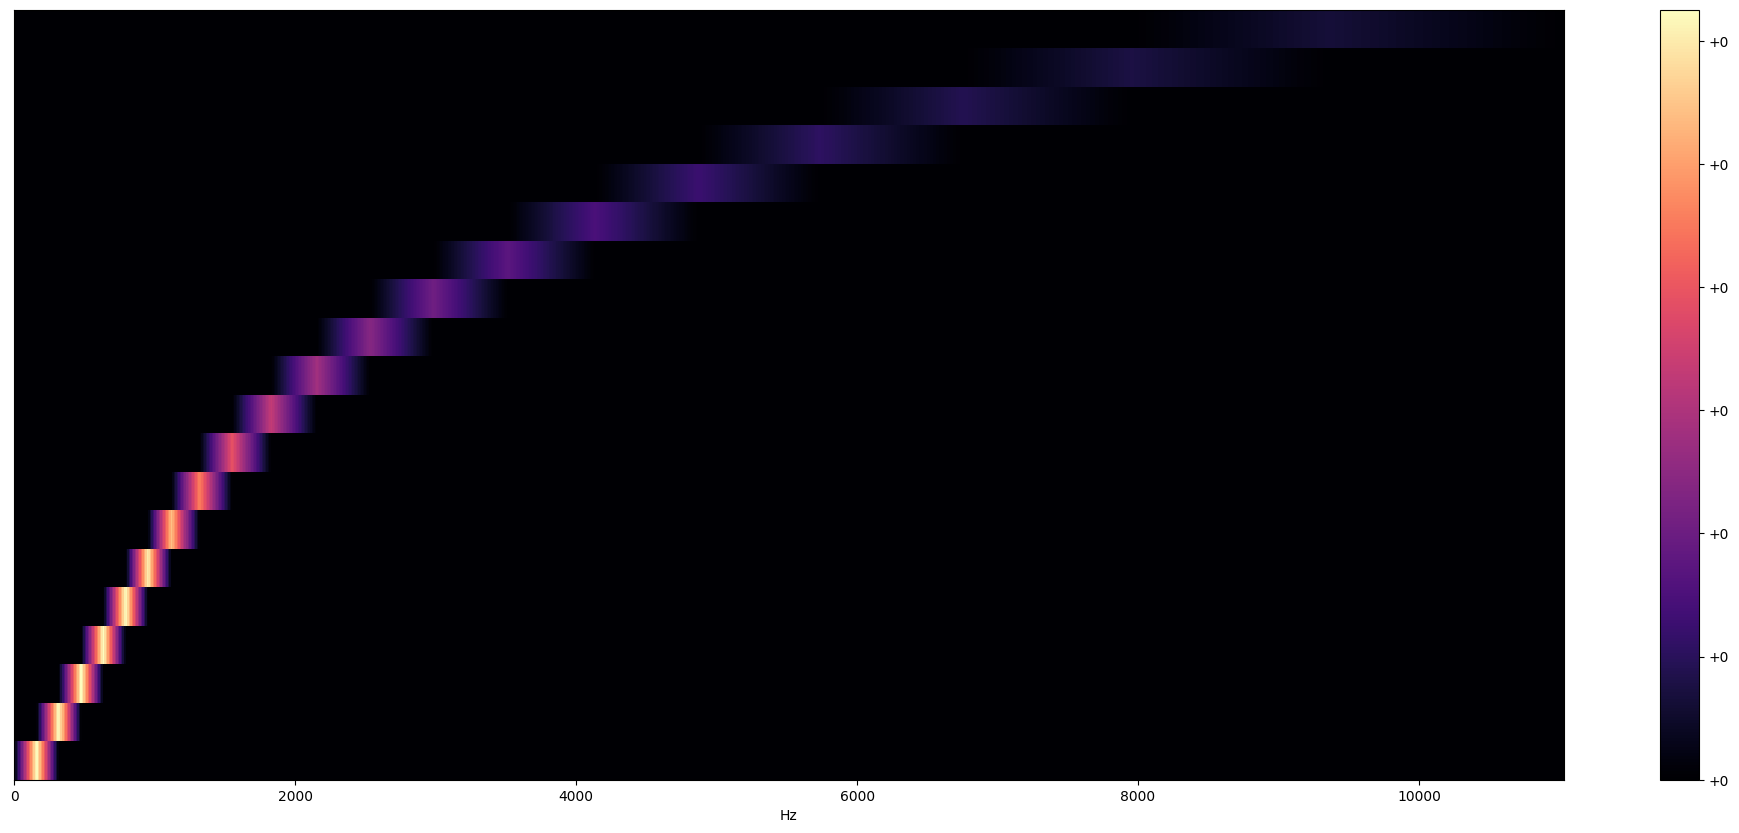

In [41]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                sr = sr,
                x_axis="linear"
                )
plt.colorbar(format="%+2.f")
plt.show()

In [58]:
mel_spectogram = librosa.feature.melspectrogram(y=meso_4ab, sr=sr_4b, n_fft=2048, hop_length=HOP_LENGTH, n_mels=10)
mel_spectogram.shape

(10, 883)

In [59]:
log_mel_spectogram= librosa.power_to_db(mel_spectogram)
log_mel_spectogram.shape

(10, 883)

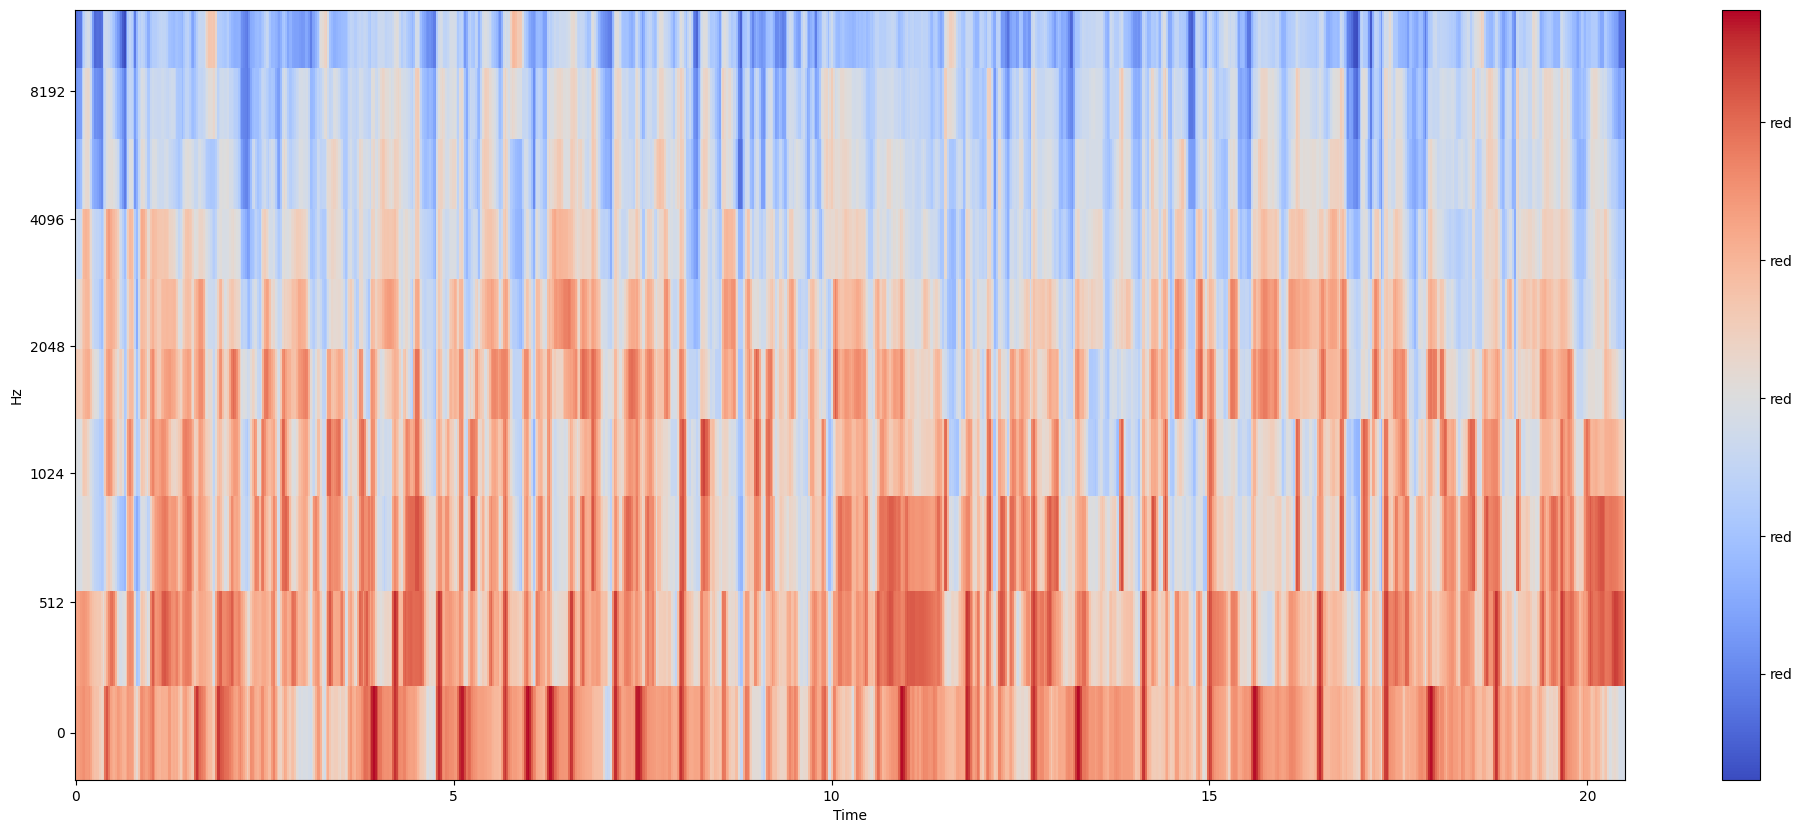

In [60]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectogram,
                         sr= sr_4b,
                         x_axis='time',
                         y_axis='mel')
plt.colorbar(format='red')
plt.show()